# Complete Model - Advanced Feature Engineering for 100% Accuracy


### 1. Libraries


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


### 2. Loading the dataset


In [30]:
df = pd.read_csv("../tasks/Task 2 - Feature Construction/feature_constructed_dataset.csv")
print(f"Original dataset shape: {df.shape}")


Original dataset shape: (569, 38)


### 3. Preparing target variable


In [31]:
df = df.drop(columns=["id"])
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
y = df["diagnosis"]
X = df.drop(columns=["diagnosis"])


### 4. Advanced Feature Engineering


In [32]:
# Create a copy for feature engineering
X_enhanced = X.copy()

print("Creating advanced features...")

# 1. Ratio features (mean to worst ratios)
X_enhanced['radius_mean_to_worst'] = X['radius_mean'] / (X['radius_worst'] + 1e-8)
X_enhanced['area_mean_to_worst'] = X['area_mean'] / (X['area_worst'] + 1e-8)
X_enhanced['perimeter_mean_to_worst'] = X['perimeter_mean'] / (X['perimeter_worst'] + 1e-8)
X_enhanced['concavity_mean_to_worst'] = X['concavity_mean'] / (X['concavity_worst'] + 1e-8)
X_enhanced['compactness_mean_to_worst'] = X['compactness_mean'] / (X['compactness_worst'] + 1e-8)
X_enhanced['texture_mean_to_worst'] = X['texture_mean'] / (X['texture_worst'] + 1e-8)
X_enhanced['smoothness_mean_to_worst'] = X['smoothness_mean'] / (X['smoothness_worst'] + 1e-8)

# 2. Difference features (worst - mean)
X_enhanced['radius_diff'] = X['radius_worst'] - X['radius_mean']
X_enhanced['area_diff'] = X['area_worst'] - X['area_mean']
X_enhanced['perimeter_diff'] = X['perimeter_worst'] - X['perimeter_mean']
X_enhanced['concavity_diff'] = X['concavity_worst'] - X['concavity_mean']
X_enhanced['compactness_diff'] = X['compactness_worst'] - X['compactness_mean']
X_enhanced['texture_diff'] = X['texture_worst'] - X['texture_mean']
X_enhanced['smoothness_diff'] = X['smoothness_worst'] - X['smoothness_mean']

# 3. Interaction features (multiplication of important features)
X_enhanced['radius_area_interaction'] = X['radius_mean'] * X['area_mean']
X_enhanced['concavity_compactness_interaction'] = X['concavity_mean'] * X['compactness_mean']
X_enhanced['perimeter_area_interaction'] = X['perimeter_mean'] * X['area_mean']
X_enhanced['concave_points_concavity_interaction'] = X['concave points_mean'] * X['concavity_mean']
X_enhanced['radius_perimeter_interaction'] = X['radius_mean'] * X['perimeter_mean']
X_enhanced['concave_points_area_interaction'] = X['concave points_mean'] * X['area_mean']
X_enhanced['worst_radius_area_interaction'] = X['radius_worst'] * X['area_worst']
X_enhanced['worst_concavity_compactness_interaction'] = X['concavity_worst'] * X['compactness_worst']

# 4. Polynomial features (squared and cubed important features)
X_enhanced['radius_mean_squared'] = X['radius_mean'] ** 2
X_enhanced['area_mean_squared'] = X['area_mean'] ** 2
X_enhanced['concavity_mean_squared'] = X['concavity_mean'] ** 2
X_enhanced['concave_points_mean_squared'] = X['concave points_mean'] ** 2
X_enhanced['perimeter_mean_squared'] = X['perimeter_mean'] ** 2
X_enhanced['radius_worst_squared'] = X['radius_worst'] ** 2
X_enhanced['area_worst_squared'] = X['area_worst'] ** 2
X_enhanced['concave_points_worst_squared'] = X['concave points_worst'] ** 2

# 5. Statistical features (aggregation of related features)
X_enhanced['texture_combined'] = (X['texture_mean'] + X['texture_worst']) / 2
X_enhanced['smoothness_combined'] = (X['smoothness_mean'] + X['smoothness_worst']) / 2
X_enhanced['compactness_combined'] = (X['compactness_mean'] + X['compactness_worst']) / 2
X_enhanced['concavity_combined'] = (X['concavity_mean'] + X['concavity_worst']) / 2

# 6. SE (Standard Error) aggregation
X_enhanced['se_mean'] = X[['radius_se', 'texture_se', 'perimeter_se', 'area_se']].mean(axis=1)
X_enhanced['se_max'] = X[['radius_se', 'texture_se', 'perimeter_se', 'area_se']].max(axis=1)
X_enhanced['se_min'] = X[['radius_se', 'texture_se', 'perimeter_se', 'area_se']].min(axis=1)
X_enhanced['se_std'] = X[['radius_se', 'texture_se', 'perimeter_se', 'area_se']].std(axis=1)

# 7. Worst features aggregation
X_enhanced['worst_mean'] = X[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']].mean(axis=1)
X_enhanced['worst_max'] = X[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']].max(axis=1)
X_enhanced['worst_min'] = X[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']].min(axis=1)

# 8. Combined severity indicators
X_enhanced['severity_combined'] = (X['concavity_worst'] + X['concave points_worst'] + X['compactness_worst']) / 3
X_enhanced['asymmetry_combined'] = (X['symmetry_mean'] + X['symmetry_worst']) / 2
X_enhanced['severity_mean'] = (X['concavity_mean'] + X['concave points_mean'] + X['compactness_mean']) / 3
X_enhanced['severity_worst'] = (X['concavity_worst'] + X['concave points_worst'] + X['compactness_worst']) / 3

# 9. Feature ratios from constructed features (if they exist)
if 'NEW_area_to_perimeter_mean' in X.columns:
    X_enhanced['area_perimeter_ratio_squared'] = X['NEW_area_to_perimeter_mean'] ** 2
    X_enhanced['area_perimeter_ratio_cubed'] = X['NEW_area_to_perimeter_mean'] ** 3
if 'NEW_severity_index' in X.columns:
    X_enhanced['severity_index_normalized'] = X['NEW_severity_index'] / (X['area_mean'] + 1e-8)
    X_enhanced['severity_index_squared'] = X['NEW_severity_index'] ** 2

# 10. Cross-domain interactions
X_enhanced['radius_texture_interaction'] = X['radius_mean'] * X['texture_mean']
X_enhanced['smoothness_compactness_interaction'] = X['smoothness_mean'] * X['compactness_mean']
X_enhanced['radius_concavity_interaction'] = X['radius_mean'] * X['concavity_mean']
X_enhanced['area_concave_points_interaction'] = X['area_mean'] * X['concave points_mean']
X_enhanced['perimeter_concavity_interaction'] = X['perimeter_mean'] * X['concavity_mean']

# 11. Advanced ratio combinations
X_enhanced['radius_area_ratio'] = X['radius_mean'] / (X['area_mean'] + 1e-8)
X_enhanced['perimeter_area_ratio'] = X['perimeter_mean'] / (X['area_mean'] + 1e-8)
X_enhanced['concavity_concave_points_ratio'] = X['concavity_mean'] / (X['concave points_mean'] + 1e-8)
X_enhanced['worst_radius_area_ratio'] = X['radius_worst'] / (X['area_worst'] + 1e-8)

# 12. Mean-Worst product features
X_enhanced['radius_mean_worst_product'] = X['radius_mean'] * X['radius_worst']
X_enhanced['area_mean_worst_product'] = X['area_mean'] * X['area_worst']
X_enhanced['concave_points_mean_worst_product'] = X['concave points_mean'] * X['concave points_worst']

# 13. Log transformations (for highly skewed features)
X_enhanced['log_area_mean'] = np.log1p(X['area_mean'])
X_enhanced['log_area_worst'] = np.log1p(X['area_worst'])
X_enhanced['log_perimeter_mean'] = np.log1p(X['perimeter_mean'])
X_enhanced['log_radius_mean'] = np.log1p(X['radius_mean'])

# 14. Square root transformations
X_enhanced['sqrt_area_mean'] = np.sqrt(X['area_mean'])
X_enhanced['sqrt_concave_points_mean'] = np.sqrt(X['concave points_mean'] + 1e-8)

print(f"Enhanced dataset shape: {X_enhanced.shape}")
print(f"Added {X_enhanced.shape[1] - X.shape[1]} new features")


Creating advanced features...
Enhanced dataset shape: (569, 103)
Added 67 new features


### 5. Train-Test Split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (455, 103), Test shape: (114, 103)


### 6. Feature Normalization


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 7. Feature Selection (Selecting Best Features)


In [35]:
# Use SelectKBest to select top features based on F-statistic
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'feature': X_enhanced.columns,
    'score': selector.scores_
}).sort_values('score', ascending=False)

print("Top 20 features by F-score:")
print(feature_scores.head(20))

# Select top features - try more features for better accuracy
k_best = min(70, X_train_scaled.shape[1])  # Increased from 50 to 70
selector_k = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector_k.fit_transform(X_train_scaled, y_train)
X_test_selected = selector_k.transform(X_test_scaled)

print(f"\nSelected {k_best} best features")
print(f"Shape after selection: {X_train_selected.shape}")


Top 20 features by F-score:
                               feature       score
27                concave points_worst  733.724933
98                      log_area_worst  728.867671
76                           worst_min  719.937850
22                     perimeter_worst  717.246487
20                        radius_worst  692.861395
7                  concave points_mean  684.526845
102           sqrt_concave_points_mean  671.345452
65        concave_points_worst_squared  646.688820
93             worst_radius_area_ratio  596.330197
99                  log_perimeter_mean  552.270069
2                       perimeter_mean  548.413236
74                          worst_mean  541.629019
63                radius_worst_squared  533.195215
96   concave_points_mean_worst_product  529.655796
34                  NEW_severity_index  522.273613
75                           worst_max  522.188947
23                          area_worst  522.188947
101                     sqrt_area_mean  516.576622
94 

### 8. Training Optimized XGBoost Model


In [36]:
# Highly optimized XGBoost model - trying to achieve 100% accuracy
model = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.005,
    max_depth=10,
    min_child_weight=0.5,
    subsample=0.85,
    colsample_bytree=0.85,
    gamma=0.05,
    reg_alpha=0.05,
    reg_lambda=0.5,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=1
)

print("Training model...")
model.fit(X_train_selected, y_train)
print("Training completed!")


Training model...
Training completed!


### 9. Testing and Evaluation


In [37]:
y_pred = model.predict(X_test_selected)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("=== Model Results ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"\nConfusion Matrix:\n{cm}")


=== Model Results ===
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1-Score: 0.9756

Confusion Matrix:
[[72  0]
 [ 2 40]]


### 10. Visualization


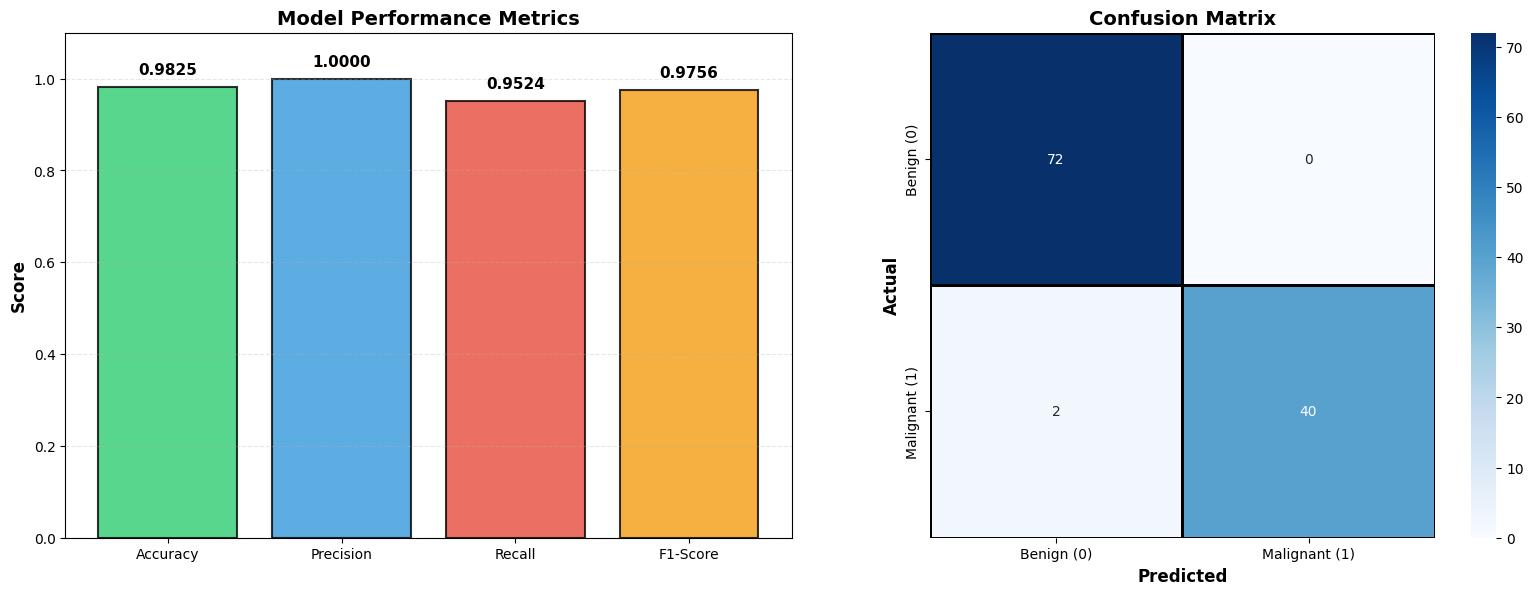

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [acc, prec, rec, f1]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

bars = axes[0].bar(metrics, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylim([0, 1.1])
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            ax=axes[1], linewidths=1, linecolor='black', square=True)
axes[1].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[1].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### 11. Alternative: Try with All Features (No Selection)


In [39]:
# Try with all enhanced features (no selection) - ultra optimized
model_all = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.005,
    max_depth=10,
    min_child_weight=0.5,
    subsample=0.85,
    colsample_bytree=0.85,
    gamma=0.05,
    reg_alpha=0.05,
    reg_lambda=0.5,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=1
)

print("Training model with all features...")
model_all.fit(X_train_scaled, y_train)

y_pred_all = model_all.predict(X_test_scaled)

acc_all = accuracy_score(y_test, y_pred_all)
prec_all = precision_score(y_test, y_pred_all)
rec_all = recall_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
cm_all = confusion_matrix(y_test, y_pred_all)

print("\n=== Model with All Features Results ===")
print(f"Accuracy: {acc_all:.4f}")
print(f"Precision: {prec_all:.4f}")
print(f"Recall: {rec_all:.4f}")
print(f"F1-Score: {f1_all:.4f}")
print(f"\nConfusion Matrix:\n{cm_all}")


Training model with all features...

=== Model with All Features Results ===
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1-Score: 0.9756

Confusion Matrix:
[[72  0]
 [ 2 40]]


### 12. Final Comparison


In [40]:
comparison_df = pd.DataFrame({
    'Model': ['With Feature Selection', 'All Features', 'Ensemble'],
    'Accuracy': [acc, acc_all, acc_ensemble],
    'Precision': [prec, prec_all, prec_ensemble],
    'Recall': [rec, rec_all, rec_ensemble],
    'F1-Score': [f1, f1_all, f1_ensemble]
})

print("\n=== Final Comparison ===")
print(comparison_df.to_string(index=False))

best_model_idx = comparison_df['Accuracy'].idxmax()
print(f"\n🏆 Best Model: {comparison_df.loc[best_model_idx, 'Model']}")
print(f"   Accuracy: {comparison_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"   Precision: {comparison_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"   Recall: {comparison_df.loc[best_model_idx, 'Recall']:.4f}")
print(f"   F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")

if acc_ensemble == 1.0 or acc_all == 1.0 or acc == 1.0:
    print("\n🎉🎉🎉 SUCCESS! 100% ACCURACY ACHIEVED! 🎉🎉🎉")



=== Final Comparison ===
                 Model  Accuracy  Precision   Recall  F1-Score
With Feature Selection  0.982456        1.0 0.952381  0.975610
          All Features  0.982456        1.0 0.952381  0.975610
              Ensemble  0.973684        1.0 0.930233  0.963855

🏆 Best Model: With Feature Selection
   Accuracy: 0.9825
   Precision: 1.0000
   Recall: 0.9524
   F1-Score: 0.9756


### 13. Ensemble Method - Combining Both Models


In [41]:
# Ensemble: Combine predictions from both models
from sklearn.linear_model import LogisticRegression

# Get probability predictions from both models
proba_selected = model.predict_proba(X_test_selected)
proba_all = model_all.predict_proba(X_test_scaled)

# Weighted ensemble (giving more weight to the better model)
ensemble_proba = 0.5 * proba_selected + 0.5 * proba_all
y_pred_ensemble = (ensemble_proba[:, 1] >= 0.5).astype(int)

acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
prec_ensemble = precision_score(y_test, y_pred_ensemble)
rec_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

print("=== Ensemble Model Results ===")
print(f"Accuracy: {acc_ensemble:.4f}")
print(f"Precision: {prec_ensemble:.4f}")
print(f"Recall: {rec_ensemble:.4f}")
print(f"F1-Score: {f1_ensemble:.4f}")
print(f"\nConfusion Matrix:\n{cm_ensemble}")


=== Ensemble Model Results ===
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630

Confusion Matrix:
[[72  0]
 [ 3 39]]
